# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data_real = pd.read_csv('train_data.csv')
resource_data_real = pd.read_csv('resources.csv')

In [3]:
project_data_real = project_data_real.sort_values(by='id')
resource_data_real = resource_data_real.sort_values(by='id')

In [4]:
project_data=project_data_real.head(5000)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25693       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
47025       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   
39507      116274  p000004  bca138d8a12a49f54d9f53fc7dbebd81            Ms.   
89709      143268  p000006  75ef002fa4f10c298b6ef3dc67cff99d           Mrs.   
52956      126686  p000007  fd9e3870ebdcb6d760bc1c333273c852           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25693           HI        2016-09-20 21:19:53             Grades 6-8   
47025           NY        2016-06-23 09:21:59          Grades PreK-2   
39507           TX        2016-08-05 23:44:40             Grades 3-5   
89709           FL        2017-02-21 21:19:01          Grades PreK-2   
52956           UT        2016-09-01 23:46:58             Grades 3-5   

                project_subject_categories  \
25693                     History & Civics   
47025                  Literacy & Language   
39507                  Literacy & Language   
89709                  Literacy & Language   
52956  Math & Science, Literacy & Language   

                project_subject_subcategories  \
25693                     History & Geography   
47025                    Literature & Writing   
39507             Foreign Languages, Literacy   
89709                                Literacy   
52956  Applied Sciences, Literature & Writing   

                                  project_title  \
25693    21st Century Learners Across the Ocean   
47025       Kindergarten Loves Literacy Centers   
39507                              Let's Read!!   
89709  Reading Success With Non-Fiction Readers   
52956            Technology to Shape Our Future   

                                         project_essay_1  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   
39507  A classroom library is the center of learning ...   
89709  The kids in my class face many challenges in t...   
52956  “This is the best thing I’ve ever done in scho...   

                                         project_essay_2 project_essay_3  \
25693  We like to combine 21st century learning with ...             NaN   
47025  Our students love literacy centers! Every morn...             NaN   
39507  The donations to this project will make a diff...             NaN   
89709  \r\n\r\nWorking in a rural title one school, t...             NaN   
52956  The computers will provide a way for students ...             NaN   

      project_essay_4                           project_resource_summary  \
25693             NaN  My students need headphones and supplemental s...   
47025             NaN  My students need phonemic awareness learning c...   
39507             NaN  My students need a variety of literature in bo...   
89709             NaN  My students need non-fiction readers and stora...   
52956             NaN  My students need 6 HP Chromebook 11 G4 11.6 In...   

       teacher_number_of_previously_posted_projects  project_is_approved  
25693                                             1                    1  
47025                                             5                    1  
39507                                             2                    1  
89709                                             5                    0  
52956                                             0                    1

In [5]:
resource_data=resource_data_real.head(5000)
resource_data.head(5)

id                                        description  quantity  \
414182  p000001  ProSource Puzzle Exercise Mat High Quality EVA...         2   
414179  p000001            Cap Barbell 300 Pound Olympic Set, Grey         2   
414181  p000001                          Marcy SB-10510 Flat Bench         1   
414180  p000001              Cap Barbell Power Rack Exercise Stand         2   
649474  p000002              10 Sony Headphones (BUY 9 GET 1 FREE)         1   

         price  
414182   23.99  
414179  261.08  
414181   85.49  
414180   89.00  
649474  134.90

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (5000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (5000, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
414182  p000001  ProSource Puzzle Exercise Mat High Quality EVA...         2   
414179  p000001            Cap Barbell 300 Pound Olympic Set, Grey         2   

         price  
414182   23.99  
414179  261.08

# 1.2 Data Analysis

Number of projects thar are approved for funding  4232 , ( 84.64 %)
Number of projects thar are not approved for funding  768 , ( 15.36 %)


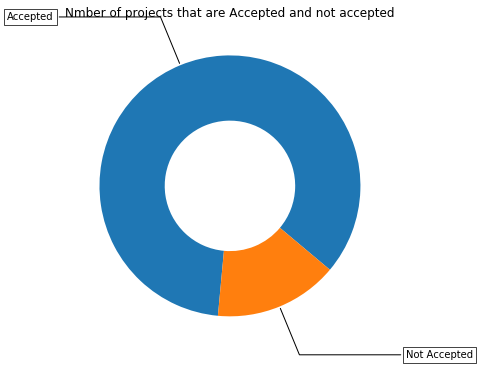

In [8]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
#above codes will give the%age of approved and not approved project

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [9]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [10]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
7          DC       0.653846
0          AK       0.666667
16         KS       0.703704
26         MT       0.714286
39         RI       0.769231
States with highest % approvals
   state_code  num_proposals
17         KY       0.979167
29         NE       1.000000
8          DE       1.000000
46         VT       1.000000
50         WY       1.000000


In [11]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [12]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

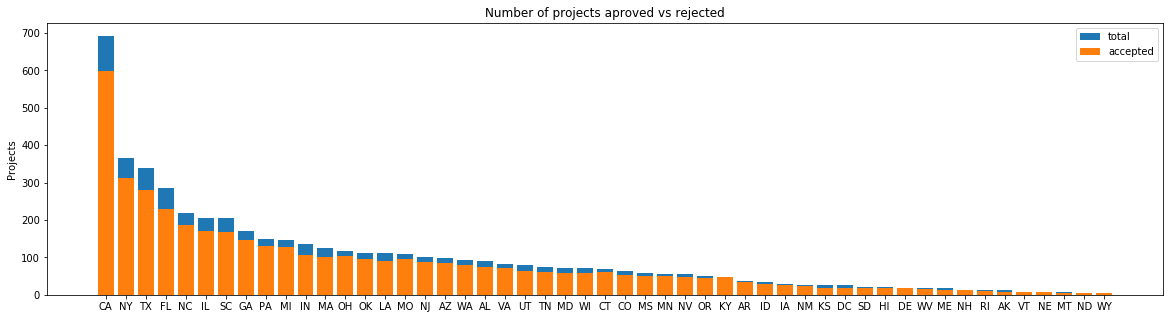

   school_state  project_is_approved  total       Avg
4            CA                  599    692  0.865607
34           NY                  312    366  0.852459
43           TX                  281    340  0.826471
9            FL                  229    285  0.803509
27           NC                  187    220  0.850000
   school_state  project_is_approved  total       Avg
46           VT                    7      7  1.000000
29           NE                    7      7  1.000000
26           MT                    5      7  0.714286
28           ND                    4      5  0.800000
50           WY                    4      4  1.000000


In [13]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

### 1.2.2 Univariate Analysis: teacher_prefix

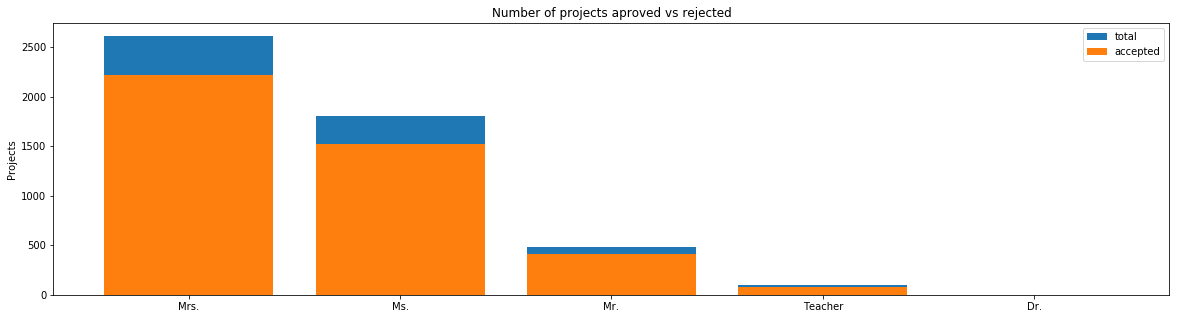

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                 2215   2613  0.847685
3            Ms.                 1524   1803  0.845258
1            Mr.                  411    483  0.850932
4        Teacher                   80     99  0.808081
0            Dr.                    1      1  1.000000
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                 2215   2613  0.847685
3            Ms.                 1524   1803  0.845258
1            Mr.                  411    483  0.850932
4        Teacher                   80     99  0.808081
0            Dr.                    1      1  1.000000


In [14]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

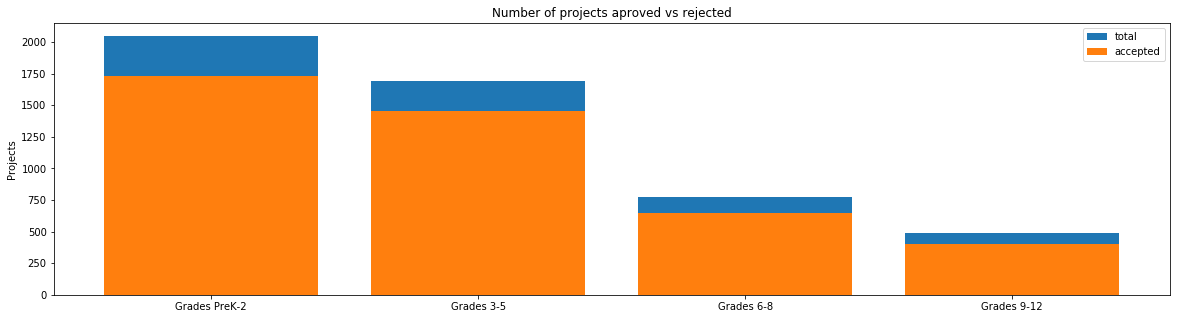

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1728   2047  0.844162
0             Grades 3-5                 1450   1692  0.856974
1             Grades 6-8                  649    776  0.836340
2            Grades 9-12                  405    485  0.835052
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1728   2047  0.844162
0             Grades 3-5                 1450   1692  0.856974
1             Grades 6-8                  649    776  0.836340
2            Grades 9-12                  405    485  0.835052


In [15]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [16]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [17]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25693       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
47025       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25693           HI        2016-09-20 21:19:53             Grades 6-8   
47025           NY        2016-06-23 09:21:59          Grades PreK-2   

      project_subject_subcategories                           project_title  \
25693           History & Geography  21st Century Learners Across the Ocean   
47025          Literature & Writing     Kindergarten Loves Literacy Centers   

                                         project_essay_1  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   

                                         project_essay_2 project_essay_3  \
25693  We like to combine 21st century learning with ...             NaN   
47025  Our students love literacy centers! Every morn...             NaN   

      project_essay_4                           project_resource_summary  \
25693             NaN  My students need headphones and supplemental s...   
47025             NaN  My students need phonemic awareness learning c...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
25693                                             1                    1   
47025                                             5                    1   

        clean_categories  
25693     History_Civics  
47025  Literacy_Language

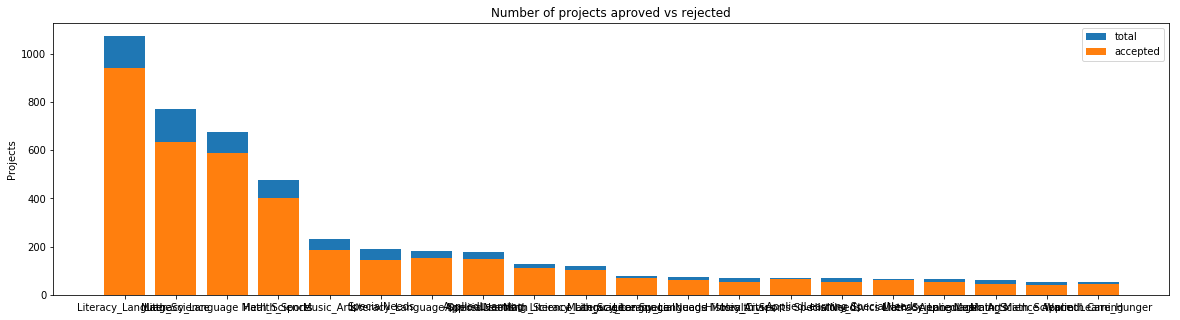

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                  941   1074  0.876164
29                    Math_Science                  636    770  0.825974
26  Literacy_Language Math_Science                  588    674  0.872404
8                    Health_Sports                  400    476  0.840336
37                      Music_Arts                  186    230  0.808696
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                   62     66  0.939394
34           Math_Science Music_Arts                   53     64  0.828125
4       AppliedLearning Math_Science                   47     60  0.783333
30      Math_Science AppliedLearning                   43     52  0.826923
43                Warmth Care_Hunger                   44     52  0.846154


In [18]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [19]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

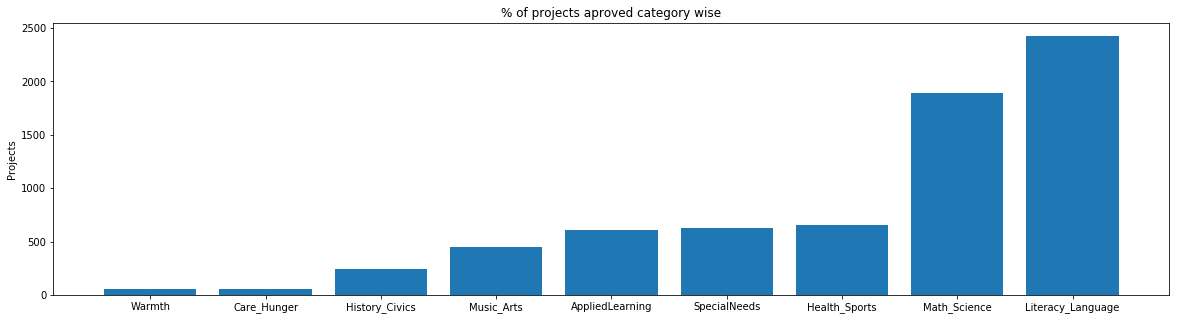

In [20]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [21]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :        57
Care_Hunger          :        57
History_Civics       :       246
Music_Arts           :       452
AppliedLearning      :       605
SpecialNeeds         :       629
Health_Sports        :       656
Math_Science         :      1891
Literacy_Language    :      2425


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [22]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [23]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
25693       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
47025       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
25693           HI        2016-09-20 21:19:53             Grades 6-8   
47025           NY        2016-06-23 09:21:59          Grades PreK-2   

                                project_title  \
25693  21st Century Learners Across the Ocean   
47025     Kindergarten Loves Literacy Centers   

                                         project_essay_1  \
25693  Our native Hawaiian students of the valley hai...   
47025  My students are excited for their first year i...   

                                         project_essay_2 project_essay_3  \
25693  We like to combine 21st century learning with ...             NaN   
47025  Our students love literacy centers! Every morn...             NaN   

      project_essay_4                           project_resource_summary  \
25693             NaN  My students need headphones and supplemental s...   
47025             NaN  My students need phonemic awareness learning c...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
25693                                             1                    1   
47025                                             5                    1   

        clean_categories clean_subcategories  
25693     History_Civics   History_Geography  
47025  Literacy_Language  Literature_Writing

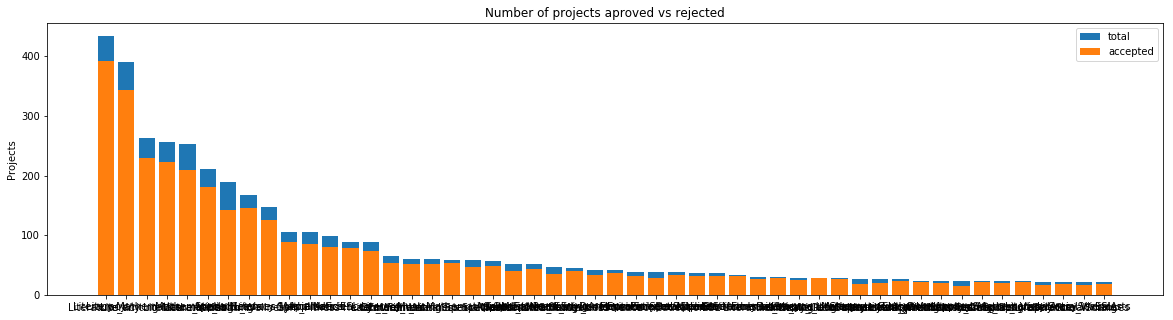

                clean_subcategories  project_is_approved  total       Avg
185                        Literacy                  392    434  0.903226
187            Literacy Mathematics                  344    390  0.882051
196  Literature_Writing Mathematics                  229    263  0.870722
186     Literacy Literature_Writing                  222    256  0.867188
204                     Mathematics                  210    253  0.830040
                      clean_subcategories  project_is_approved  total  \
177  History_Geography Literature_Writing                   22     23   
182      History_Geography SocialSciences                   17     22   
192               Literacy SocialSciences                   19     22   
194                   Literacy VisualArts                   16     21   
71                                    ESL                   18     21   

          Avg  
177  0.956522  
182  0.772727  
192  0.863636  
194  0.761905  
71   0.857143  


In [24]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [25]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

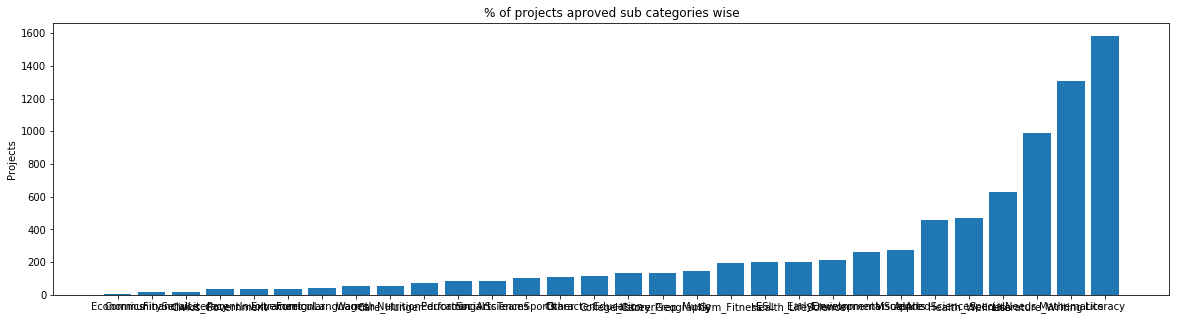

In [26]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved sub categories wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [27]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :         7
CommunityService     :        17
FinancialLiteracy    :        18
Civics_Government    :        34
ParentInvolvement    :        37
Extracurricular      :        38
ForeignLanguages     :        41
Warmth               :        57
Care_Hunger          :        57
NutritionEducation   :        70
PerformingArts       :        85
SocialSciences       :        87
TeamSports           :       102
Other                :       108
CharacterEducation   :       113
College_CareerPrep   :       134
History_Geography    :       135
Music                :       145
Gym_Fitness          :       194
ESL                  :       200
Health_LifeScience   :       203
EarlyDevelopment     :       211
EnvironmentalScience :       265
VisualArts           :       273
AppliedSciences      :       455
Health_Wellness      :       470
SpecialNeeds         :       629
Literature_Writing   :       991
Mathematics          :      1306
Literacy             :      1583


### 1.2.6 Univariate Analysis: Text features (Title)

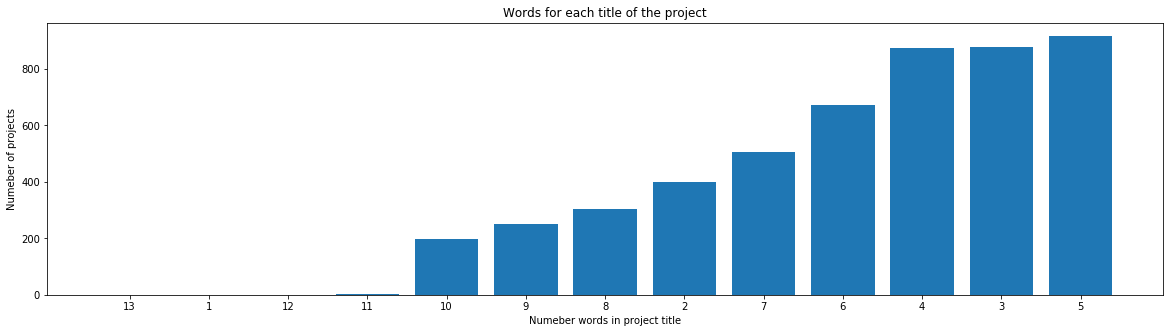

In [28]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [29]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

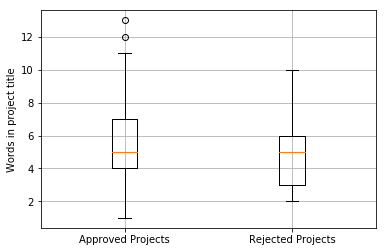

In [30]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

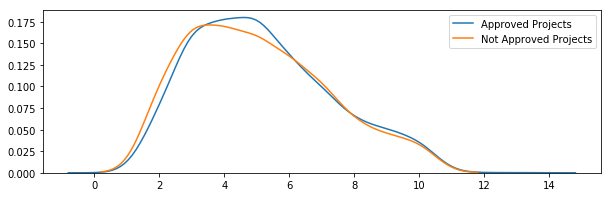

In [31]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [32]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [33]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

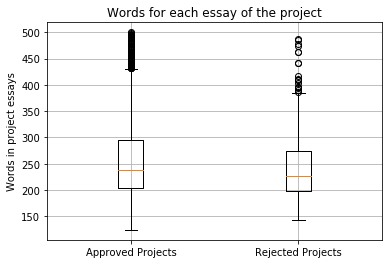

In [34]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

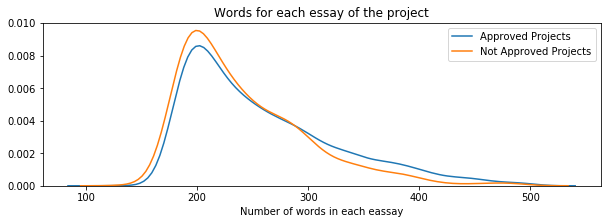

In [35]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [36]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
414182  p000001  ProSource Puzzle Exercise Mat High Quality EVA...         2   
414179  p000001            Cap Barbell 300 Pound Olympic Set, Grey         2   

         price  
414182   23.99  
414179  261.08

In [37]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [38]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [39]:
#https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns/18691949
project_data['price'] = project_data['price'].fillna((project_data['price'].mean()))
project_data['quantity'] = project_data['quantity'].fillna((project_data['quantity'].mean()))

In [40]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

In [41]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
1       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           HI        2016-09-20 21:19:53             Grades 6-8   
1           NY        2016-06-23 09:21:59          Grades PreK-2   

                            project_title  \
0  21st Century Learners Across the Ocean   
1     Kindergarten Loves Literacy Centers   

                                     project_essay_1  \
0  Our native Hawaiian students of the valley hai...   
1  My students are excited for their first year i...   

                                     project_essay_2 project_essay_3  \
0  We like to combine 21st century learning with ...             NaN   
1  Our students love literacy centers! Every morn...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need headphones and supplemental s...   
1             NaN  My students need phonemic awareness learning c...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             1                    1   
1                                             5                    1   

    clean_categories clean_subcategories  \
0     History_Civics   History_Geography   
1  Literacy_Language  Literature_Writing   

                                               essay   price  quantity  
0  Our native Hawaiian students of the valley hai...  515.89      21.0  
1  My students are excited for their first year i...  298.97       4.0

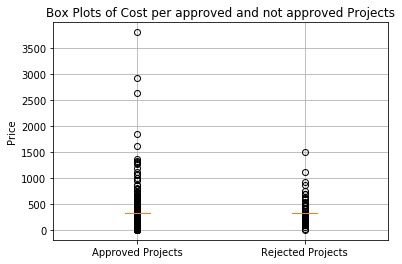

In [42]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

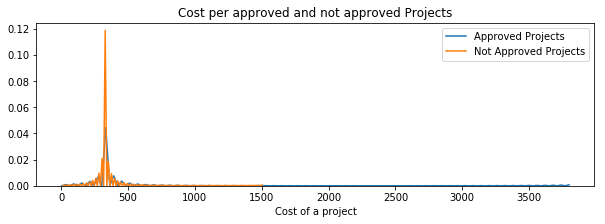

In [43]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [44]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        5.01       |         12.49         |
|     5      |      330.401      |        330.401        |
|     10     |      330.401      |        330.401        |
|     15     |      330.401      |        330.401        |
|     20     |      330.401      |        330.401        |
|     25     |      330.401      |        330.401        |
|     30     |      330.401      |        330.401        |
|     35     |      330.401      |        330.401        |
|     40     |      330.401      |        330.401        |
|     45     |      330.401      |        330.401        |
|     50     |      330.401      |        330.401        |
|     55     |      330.401      |        330.401        |
|     60     |      330.401      |        330.401        |
|     65     |      330.401      |        330.401       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

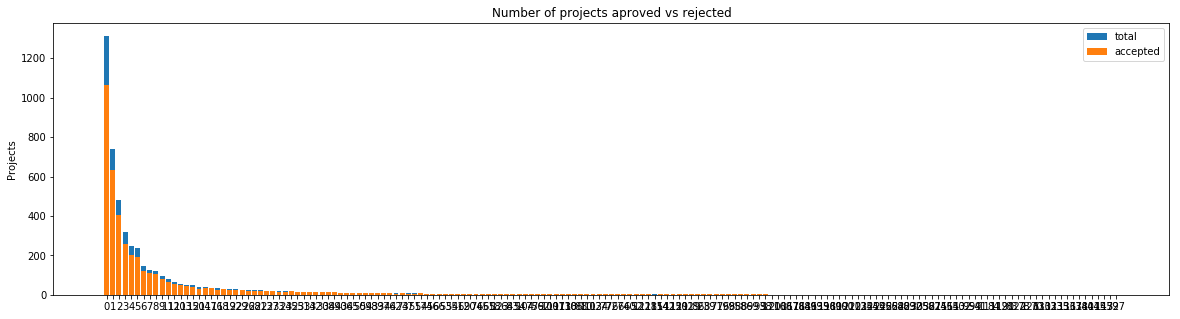

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                 1062   1313   
1                                             1                  634    742   
2                                             2                  404    479   
3                                             3                  259    318   
4                                             4                  202    245   

        Avg  
0  0.808835  
1  0.854447  
2  0.843424  
3  0.814465  
4  0.824490  
     teacher_number_of_previously_posted_projects  project_is_approved  total  \
128                                           141                    1      1   
130                                           145                    1      1   
132                                           147                    1      1   
133                                           152                    1      1   
164                                 

In [45]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', False)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [46]:
#Here I am replacing each row of summary having any numerical value with 1 otherwise 0
project_summary = list(project_data['project_resource_summary'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_summary_list = []
for i in project_summary:
    digit = re.findall('\d+', i ) #https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas/35376466
    if len(digit)==0:              #https://stackoverflow.com/questions/53513/how-do-i-check-if-a-list-is-empty
        project_summary_list.append(0)  #when summary contains no numerical value ,append with 0
    else:
        project_summary_list.append(1)   #when summary contains numerical value , append with 1
      
        
             

In [47]:
project_data['project_res_summary'] = project_summary_list
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
1       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           HI        2016-09-20 21:19:53             Grades 6-8   
1           NY        2016-06-23 09:21:59          Grades PreK-2   

                            project_title  \
0  21st Century Learners Across the Ocean   
1     Kindergarten Loves Literacy Centers   

                                     project_essay_1  \
0  Our native Hawaiian students of the valley hai...   
1  My students are excited for their first year i...   

                                     project_essay_2 project_essay_3  \
0  We like to combine 21st century learning with ...             NaN   
1  Our students love literacy centers! Every morn...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             1   
1             NaN                                             5   

   project_is_approved   clean_categories clean_subcategories  \
0                    1     History_Civics   History_Geography   
1                    1  Literacy_Language  Literature_Writing   

                                               essay   price  quantity  \
0  Our native Hawaiian students of the valley hai...  515.89      21.0   
1  My students are excited for their first year i...  298.97       4.0   

   project_res_summary  
0                    0  
1                    0

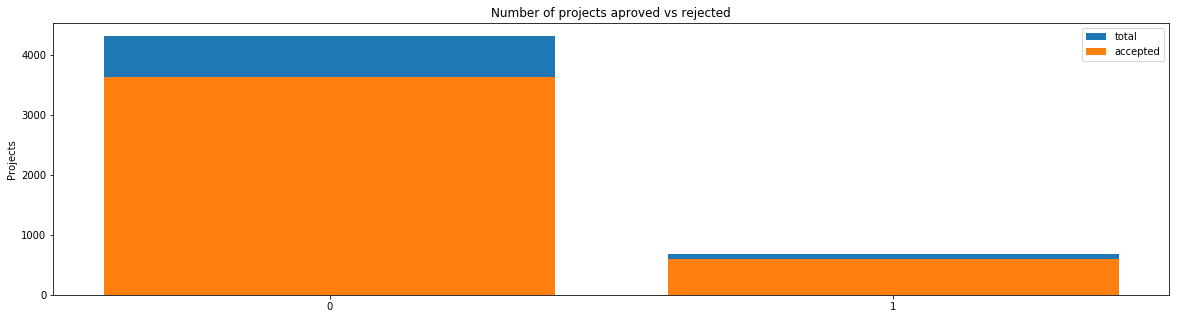

   project_res_summary  project_is_approved  total      Avg
0                    0                 3629   4317  0.84063
1                    1                  603    683  0.88287
   project_res_summary  project_is_approved  total      Avg
0                    0                 3629   4317  0.84063
1                    1                  603    683  0.88287


In [48]:
univariate_barplots(project_data, 'project_res_summary', 'project_is_approved', False)

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [49]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           Mrs.   
1       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           HI        2016-09-20 21:19:53             Grades 6-8   
1           NY        2016-06-23 09:21:59          Grades PreK-2   

                            project_title  \
0  21st Century Learners Across the Ocean   
1     Kindergarten Loves Literacy Centers   

                                     project_essay_1  \
0  Our native Hawaiian students of the valley hai...   
1  My students are excited for their first year i...   

                                     project_essay_2 project_essay_3  \
0  We like to combine 21st century learning with ...             NaN   
1  Our students love literacy centers! Every morn...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             1   
1             NaN                                             5   

   project_is_approved   clean_categories clean_subcategories  \
0                    1     History_Civics   History_Geography   
1                    1  Literacy_Language  Literature_Writing   

                                               essay   price  quantity  \
0  Our native Hawaiian students of the valley hai...  515.89      21.0   
1  My students are excited for their first year i...  298.97       4.0   

   project_res_summary  
0                    0  
1                    0

In [50]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


Our native Hawaiian students of the valley hail from a tight knit community.  Many are from low socioeconomic backgrounds. Yet they remain a proud people not inclined to ask for hand outs. They   are genuine souls who face trials and tribulations on a daily basis. \r\n\r\nOur students come from predominately low socio-economic backgrounds with over 80% of our students receiving free or reduced lunch.  We also have a population of students who are homeless. \r\n\r\nIn spite of their struggles they come to school with positive attitudes and a smile. They are genuine, caring, and always thankful. Many aspire to attend college and will work hard to make that happen.We like to combine 21st century learning with traditional learning.  This allows our students the time to acclimate to the changes and become active 21st century learners.  \r\n\r\nAs 21st century learners, the students require access to a variety of tools and technology. Use of technology serves to engage the students with vary

In [51]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)  #this will all won't to will not 
    phrase = re.sub(r"can\'t", "can not", phrase)  #similarly can't to can not and all listed below

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase                               #this will return the phrase with all the replaced value

In [52]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

Coming in to my classroom would be a surprise for some people, since we speak Spanish.  My second grade Spanish immersion is full of engagement, hands-on learning, and discovery through language.  The more concrete we can make our lessons, the easier it is for students to learn the content and Spanish.  I have 54 students from various demographic and economic backgrounds, as well as a wide spectrum of academic abilities.  It is always an adventure in our classroom and we learn new things every day!LearntoLearn Lego Kits provide hands-on learning opportunities for students in literacy, math, science, and engineering.  These simple kits engage students and encourage them to use their language (which is Spanish) through teamwork and problem solving.  Rather than huge bulky kits that rarely are taken out to use, Learntolearn are so simple that they can be used on a regular basis without taking time away from required core curriculum.\r\nThe Lego wheels kit will also help facilitate STEM pr

In [53]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Coming in to my classroom would be a surprise for some people, since we speak Spanish.  My second grade Spanish immersion is full of engagement, hands-on learning, and discovery through language.  The more concrete we can make our lessons, the easier it is for students to learn the content and Spanish.  I have 54 students from various demographic and economic backgrounds, as well as a wide spectrum of academic abilities.  It is always an adventure in our classroom and we learn new things every day!LearntoLearn Lego Kits provide hands-on learning opportunities for students in literacy, math, science, and engineering.  These simple kits engage students and encourage them to use their language (which is Spanish) through teamwork and problem solving.  Rather than huge bulky kits that rarely are taken out to use, Learntolearn are so simple that they can be used on a regular basis without taking time away from required core curriculum.  The Lego wheels kit will also help facilitate STEM proj

In [54]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent) #here all the letters and numbers combining A-Z and a-z and numbers will 
print(sent)                                #kept and other things will be erased

Coming in to my classroom would be a surprise for some people since we speak Spanish My second grade Spanish immersion is full of engagement hands on learning and discovery through language The more concrete we can make our lessons the easier it is for students to learn the content and Spanish I have 54 students from various demographic and economic backgrounds as well as a wide spectrum of academic abilities It is always an adventure in our classroom and we learn new things every day LearntoLearn Lego Kits provide hands on learning opportunities for students in literacy math science and engineering These simple kits engage students and encourage them to use their language which is Spanish through teamwork and problem solving Rather than huge bulky kits that rarely are taken out to use Learntolearn are so simple that they can be used on a regular basis without taking time away from required core curriculum The Lego wheels kit will also help facilitate STEM projects in our classroom Bui

In [55]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [56]:
# Combining all the above statemennts 
from tqdm import tqdm        #with tqdm will will have some idea of time taking by loop to complete
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 374.01it/s]


In [57]:
# after preprocesing
preprocessed_essays[1000]

'the students i serve attending college preparatory school our school high poverty neighborhood 85 free reduced lunch for many first attend college family i want help achieve dream start believing early kindergarten this dream starts first day school i meet say congratulations unt eagle this truly different type request classroom i selected items decorate classroom next school year each item i selected represent love school i graduated i passing joy class even though kindergarten love knowing one day go unt like teacher these items would constant reminder college closer may even imagine i chosen flags football helmets bring school spirit inside classroom my classroom decor name represent unt i want students walk feel pride understand no matter come college possibility that belief starts space full mean green pride nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [58]:
# similarly you can preprocess the titles also
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)


21st Century Learners Across the Ocean
Just A'Swinging
Mean Green Pride


In [59]:
title_sent = decontracted(project_data['project_title'].values[2000])
print(title_sent)
print("="*50)

Building leads to language discovery


In [60]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
title_sent = title_sent.replace('\\r', ' ')
title_sent = title_sent.replace('\\"', ' ')
title_sent = title_sent.replace('\\n', ' ')
print(title_sent)

Building leads to language discovery


In [61]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
title_sent = re.sub('[^A-Za-z0-9]+', ' ', title_sent)
print(title_sent)

Building leads to language discovery


In [62]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    title_sent = decontracted(sentance)
    title_sent = title_sent.replace('\\r', ' ')
    title_sent = title_sent.replace('\\"', ' ')
    title_sent = title_sent.replace('\\n', ' ')
    title_sent = re.sub('[^A-Za-z0-9]+', ' ', title_sent)
    # https://gist.github.com/sebleier/554280
    title_sent = ' '.join(e for e in title_sent.split() if e not in stopwords)
    preprocessed_titles.append(title_sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 6580.87it/s]


In [63]:
# after preprocesing
preprocessed_titles[2000]

'building leads language discovery'

## 1. 4 Preparing data for models

In [64]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price', 'quantity', 'project_res_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True) #this will change categorical data into binary form
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (5000, 9)


In [66]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values) #this will change categorical data into binary form
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'Civics_Government', 'ParentInvolvement', 'Extracurricular', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'PerformingArts', 'SocialSciences', 'TeamSports', 'Other', 'CharacterEducation', 'College_CareerPrep', 'History_Geography', 'Music', 'Gym_Fitness', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'EnvironmentalScience', 'VisualArts', 'AppliedSciences', 'Health_Wellness', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (5000, 30)


In [67]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

In [68]:
#project_data.teacher_prefix.replace(-1, np.nan)  #https://stackoverflow.com/questions/41882011/pandas-handling-nans-in-categorical-data
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("") #fill all NaN value with ""
prefix_teacher = list(project_data['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

teacher_prefix_list = []
for i in prefix_teacher:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    teacher_prefix_list.append(temp.strip())

In [69]:
project_data['teach_pref'] = teacher_prefix_list #create new column having name teach_pref with preprocessed data
project_data.drop(['teacher_prefix'], axis=1, inplace=True) #delete the teacher_prefix column
project_data.head(2)


Unnamed: 0       id                        teacher_id school_state  \
0       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           HI   
1       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           NY   

  project_submitted_datetime project_grade_category  \
0        2016-09-20 21:19:53             Grades 6-8   
1        2016-06-23 09:21:59          Grades PreK-2   

                            project_title  \
0  21st Century Learners Across the Ocean   
1     Kindergarten Loves Literacy Centers   

                                     project_essay_1  \
0  Our native Hawaiian students of the valley hai...   
1  My students are excited for their first year i...   

                                     project_essay_2 project_essay_3  \
0  We like to combine 21st century learning with ...             NaN   
1  Our students love literacy centers! Every morn...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             1   
1             NaN                                             5   

   project_is_approved   clean_categories clean_subcategories  \
0                    1     History_Civics   History_Geography   
1                    1  Literacy_Language  Literature_Writing   

                                               essay   price  quantity  \
0  Our native Hawaiian students of the valley hai...  515.89      21.0   
1  My students are excited for their first year i...  298.97       4.0   

   project_res_summary teach_pref  
0                    0       Mrs.  
1                    0       Mrs.

In [70]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['teach_pref'].values:
    my_counter.update(word.split())

In [71]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teach_pref_dict = dict(my_counter)
sorted_teach_pref_dict = dict(sorted(teach_pref_dict.items(), key=lambda kv: kv[1]))


In [72]:
#Teacher Prefix
#https://stackoverflow.com/questions/48090658/sklearn-how-to-incorporate-missing-data-when-one-hot-encoding
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_teach_pref_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(project_data['teach_pref'].values)
print(vectorizer1.get_feature_names())


teach_pref_one_hot = vectorizer1.transform(project_data['teach_pref'].values)
print("Shape of matrix after one hot encodig ",teach_pref_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (5000, 5)


In [73]:
#project_data.project_grade_category.replace(-1, np.nan)  #https://stackoverflow.com/questions/41882011/pandas-handling-nans-in-categorical-data
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['project_grade_category']=project_data['project_grade_category'].fillna("") #fill all NaN value with ""
project_grad_cat = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grad_list = []
for i in project_grad_cat:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grad_list.append(temp.strip())

In [74]:
project_data['project_grad_cat'] = project_grad_list    #create new column having name project_grad_cat with preprocessed data
project_data.drop(['project_grade_category'], axis=1, inplace=True) #delete the project_grade_category column
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0       34858  p000002  638363148ff34bcbe004fcaeb7c9a544           HI   
1       89122  p000003  c8e40d76c14dbc404075f9013d5cd166           NY   

  project_submitted_datetime                           project_title  \
0        2016-09-20 21:19:53  21st Century Learners Across the Ocean   
1        2016-06-23 09:21:59     Kindergarten Loves Literacy Centers   

                                     project_essay_1  \
0  Our native Hawaiian students of the valley hai...   
1  My students are excited for their first year i...   

                                     project_essay_2 project_essay_3  \
0  We like to combine 21st century learning with ...             NaN   
1  Our students love literacy centers! Every morn...             NaN   

  project_essay_4  teacher_number_of_previously_posted_projects  \
0             NaN                                             1   
1             NaN                                             5   

   project_is_approved   clean_categories clean_subcategories  \
0                    1     History_Civics   History_Geography   
1                    1  Literacy_Language  Literature_Writing   

                                               essay   price  quantity  \
0  Our native Hawaiian students of the valley hai...  515.89      21.0   
1  My students are excited for their first year i...  298.97       4.0   

   project_res_summary teach_pref project_grad_cat  
0                    0       Mrs.        Grades6-8  
1                    0       Mrs.     GradesPreK-2

In [75]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['project_grad_cat'].values:
    my_counter.update(word.split())

In [76]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grad_dict = dict(my_counter)  #this will make a dictionary with keys and values of words and its counts
sorted_project_grad_dict = dict(sorted(project_grad_dict.items(), key=lambda kv: kv[1])) #result a sorted dictionary by number of counts


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grad_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grad_cat'].values)
print(vectorizer.get_feature_names())


project_grad_one_hot = vectorizer.transform(project_data['project_grad_cat'].values)  #this will change categorical data into binary form
print("Shape of matrix after one hot encodig ",project_grad_one_hot.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix after one hot encodig  (5000, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [78]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(min_df=10) 
text_bow = vectorizer.fit_transform(preprocessed_essays) #this will convert words into n dimensional vector
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (5000, 4356)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [79]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [80]:
# Similarly you can vectorize for title also
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer_bow = CountVectorizer(min_df=10)
title_bow = vectorizer_bow.fit_transform(preprocessed_titles)  #this will convert word into n dimensional vectors
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (5000, 397)


#### 1.4.2.3 TFIDF vectorizer

In [81]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10) #consider words with atleast 10 documents
text_tfidf = vectorizer.fit_transform(preprocessed_essays)  #this will convert word into n dimensional vectors
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (5000, 4356)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [82]:
# Similarly you can vectorize for title also
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10)  #consider words with atleast 10 documents
title_tfidf = vectorizer_tfidf.fit_transform(preprocessed_titles)  #this will convert word into n dimensional vectors
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (5000, 397)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [83]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

#Due to no GPU and less memory I am not using above code

In [84]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [85]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 795.55it/s]


5000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [86]:
# Similarly you can vectorize for title also

In [87]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_1.append(vector)

print(len(avg_w2v_vectors_1))
print(len(avg_w2v_vectors_1[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 10823.92it/s]


5000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [88]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [89]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:48<00:00, 104.05it/s]


5000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [90]:
# Similarly you can vectorize for title also

In [91]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_1 = TfidfVectorizer()
tfidf_model_1.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_1.get_feature_names(), list(tfidf_model_1.idf_)))
tfidf_words = set(tfidf_model_1.get_feature_names())

In [92]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors2.append(vector)

print(len(tfidf_w2v_vectors2))
print(len(tfidf_w2v_vectors2[0]))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4926.49it/s]


5000
300


### 1.4.3 Vectorizing Numerical features

In [93]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 330.4008894878707, Standard deviation : 104.02568155797536


In [94]:
price_standardized

array([[ 1.78310882e+00],
       [-3.02145480e-01],
       [ 7.52976668e+00],
       ...,
       [-5.46436399e-16],
       [-5.46436399e-16],
       [-5.46436399e-16]])

In [95]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# quantity_standardized = standardScalar.fit(project_data['quantity'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 15.908355795148253, Standard deviation : 6.45797002311152


In [96]:
quantity_standardized

array([[ 7.88427971e-01],
       [-1.84397818e+00],
       [ 1.27116794e+01],
       ...,
       [-8.25192824e-16],
       [-8.25192824e-16],
       [-8.25192824e-16]])

In [97]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# quantity_standardized = standardScalar.fit(project_data['teacher_number_of_previously_posted_projects
#'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

previous_scalar = StandardScaler()
previous_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {previous_scalar.mean_[0]}, Standard deviation : {np.sqrt(previous_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_standardized = previous_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

c:\program files (x86)\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 10.9874, Standard deviation : 26.371887327986215


c:\program files (x86)\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [98]:
previous_standardized

array([[-0.37871389],
       [-0.22703722],
       [-0.34079472],
       ...,
       [-0.41663306],
       [-0.41663306],
       [-0.34079472]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [99]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(5000, 9)
(5000, 30)
(5000, 4356)
(5000, 1)


In [100]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(5000, 4396)

# A:categorical, numerical features + project_title(BOW)

In [101]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
tsne_plot_1=hstack((teach_pref_one_hot, categories_one_hot, sub_categories_one_hot, project_grad_one_hot, price_standardized, quantity_standardized, previous_standardized, title_bow))

In [102]:
tsne_plot_1.shape

(5000, 448)

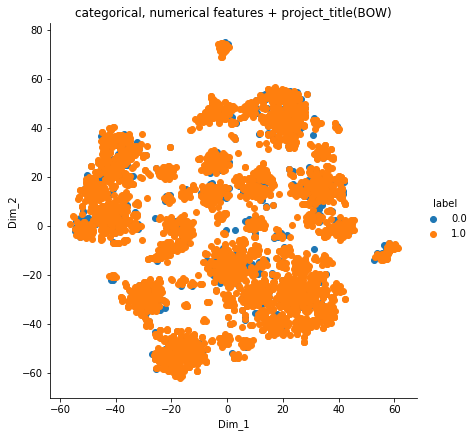

In [103]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = tsne_plot_1
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("categorical, numerical features + project_title(BOW)")
plt.show()

# B:categorical, numerical features + project_title(TFIDF)

In [104]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
tsne_plot_2=hstack((teach_pref_one_hot, categories_one_hot, sub_categories_one_hot, project_grad_one_hot, price_standardized, quantity_standardized, previous_standardized, title_tfidf))

In [105]:
tsne_plot_2.shape

(5000, 448)

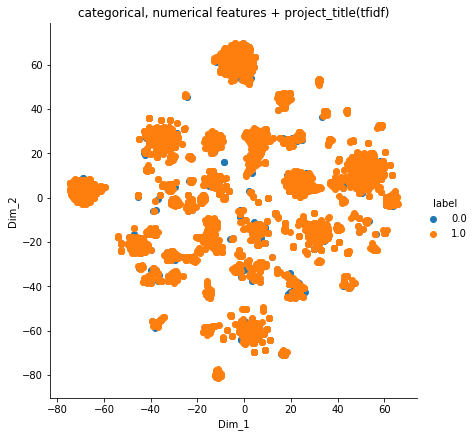

In [106]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = tsne_plot_2
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("categorical, numerical features + project_title(tfidf)")
plt.show()

# C:categorical, numerical features + project_title(AVG W2V)

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
tsne_plot_3=hstack((teach_pref_one_hot, categories_one_hot, sub_categories_one_hot, project_grad_one_hot, price_standardized, quantity_standardized, previous_standardized, avg_w2v_vectors_1))

In [108]:
tsne_plot_3.shape

(5000, 351)

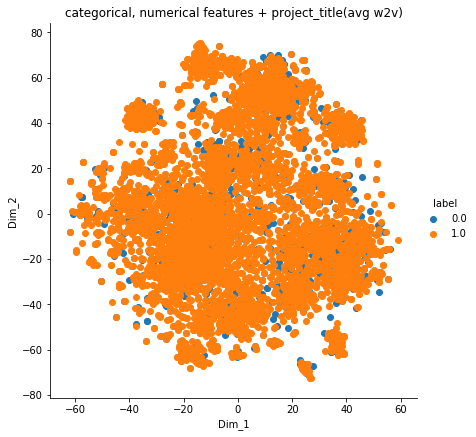

In [109]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = tsne_plot_3
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("categorical, numerical features + project_title(avg w2v)")
plt.show()

# D:categorical, numerical features + project_title(TFIDF W2V)

In [110]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
tsne_plot_4=hstack((teach_pref_one_hot, categories_one_hot, sub_categories_one_hot, project_grad_one_hot, price_standardized, quantity_standardized, previous_standardized, tfidf_w2v_vectors2))

In [111]:
tsne_plot_4.shape

(5000, 351)

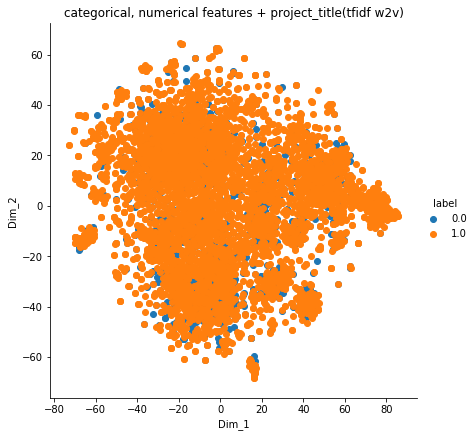

In [112]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = tsne_plot_4
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("categorical, numerical features + project_title(tfidf w2v)")
plt.show()

# tsne on all dataset

In [113]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
tsne_plot_5=hstack((teach_pref_one_hot, categories_one_hot, sub_categories_one_hot,\
                    project_grad_one_hot, price_standardized, quantity_standardized,\
                    previous_standardized, tfidf_w2v_vectors2, tfidf_w2v_vectors,\
                    avg_w2v_vectors, text_tfidf, text_bow ))

In [114]:
tsne_plot_5.shape

(5000, 9663)

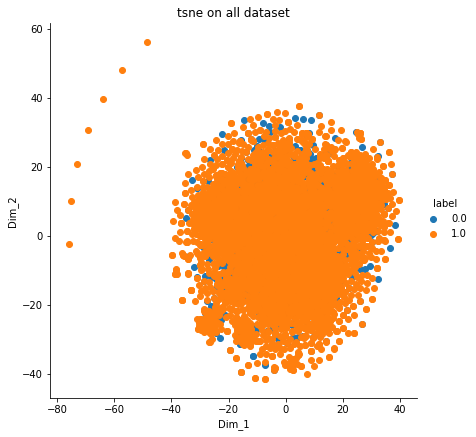

In [115]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = tsne_plot_5
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("tsne on all dataset")
plt.show()

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [116]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

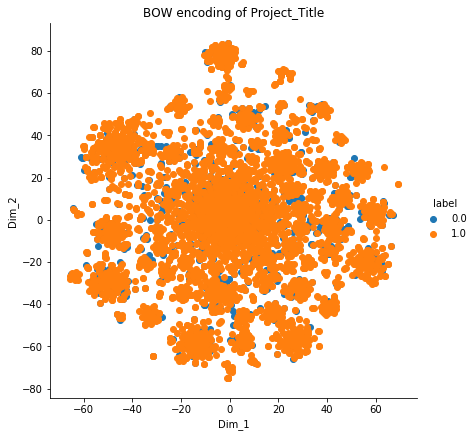

In [117]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = title_bow
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("BOW encoding of Project_Title")
plt.show()

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [118]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

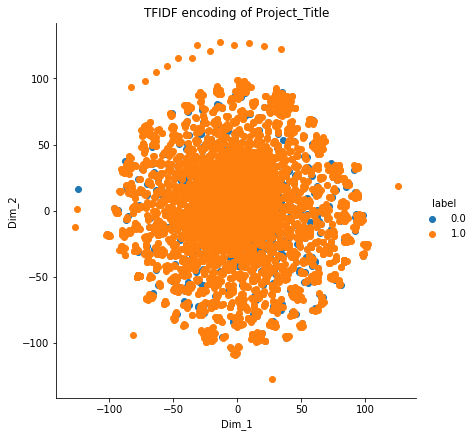

In [119]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

x = title_tfidf
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TFIDF encoding of Project_Title")
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [120]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

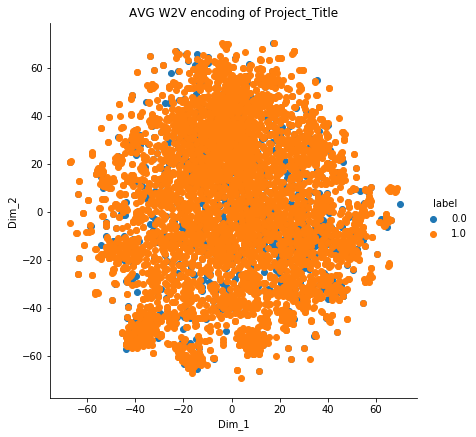

In [121]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

X = avg_w2v_vectors_1
x = avg_w2v_vectors_1[:5000]#Showing memory error
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("AVG W2V encoding of Project_Title")
plt.show()    

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [122]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

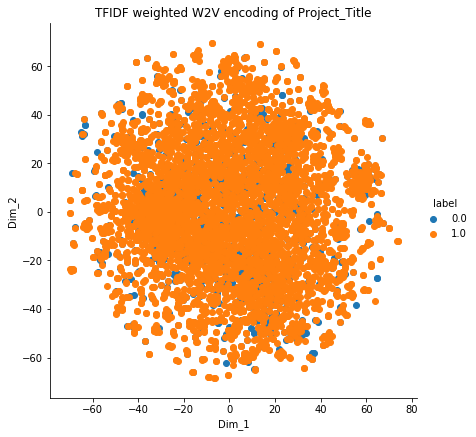

In [123]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

X = tfidf_w2v_vectors2
x = tfidf_w2v_vectors2[:5000]#Showing memory error
y = project_data['project_is_approved']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T#y.reshape(-1,1)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dim_1','Dim_2','label'])
# Ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TFIDF weighted W2V encoding of Project_Title")
plt.show()    

<h2> 2.5 Summary </h2>

In [124]:
# Write few sentences about the results that you obtained and the observations you made.